In [2]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set directories and inputs
path_to_root = '../../..'
path_to_results = os.path.join(path_to_root,'results')
results_csv = os.path.join(path_to_results,'results_validation_fasterRCNN-07-27.csv')

medium_thres = 500
large_thres = 1800
iou_thres = str(0.0)

In [4]:
# read as csv
results_df = pd.read_csv(results_csv)
results_df = results_df.drop('Unnamed: 0', axis=1)

In [5]:
# size thresholding
small_results_df = results_df[results_df['size'] < medium_thres]
medium_results_df = results_df[results_df['size'] < large_thres]
medium_results_df = medium_results_df[medium_results_df['size'] > medium_thres]
large_results_df = results_df[results_df['size'] > large_thres]

In [6]:
# function to add precision and recall
def add_prec_recall (df):
    '''
    Args:
        dataframe: dataframe with columns image, ground_truth, predicted, confidence, size, iou, tp, fp, fn
    Returns:
        dataframe: dataframe sorted by confidence score, with cumulative precision and recall
    '''
    # sort by confidence score and reset index
    df = df.sort_values(by='confidence', ascending=False)
    df= df.reset_index()
    # cumulative sum of precision
    df['cum_tp'] = df['tp@IoU'+str(iou_thres)].cumsum()
    df['cum_fp'] = df['fp@IoU'+str(iou_thres)].cumsum()
    df['precision'] = df['cum_tp'] / (df['cum_tp'] + df['cum_fp'])
    # cumulative sum of recall
    n_true_dams = len(df[df['ground_truth'].notnull()])
    df['recall'] = df['cum_tp'] / n_true_dams
    df = df.drop('cum_tp', axis=1).drop('cum_fp', axis=1)
    
    return df

In [7]:
# add precision and recall
results_df = add_prec_recall(results_df)
small_results_df = add_prec_recall(small_results_df)
medium_results_df = add_prec_recall(medium_results_df)
large_results_df = add_prec_recall(large_results_df)

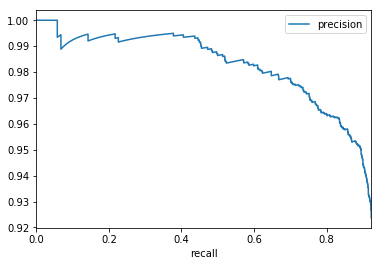

In [8]:
large_pr_df = large_results_df[['precision', 'recall']]
large_pr_df.plot(x='recall', y='precision')

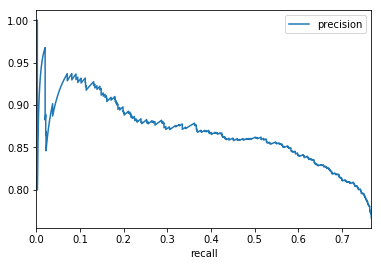

In [9]:
medium_pr_df = medium_results_df[['precision', 'recall']]
medium_pr_df.plot(x='recall', y='precision')

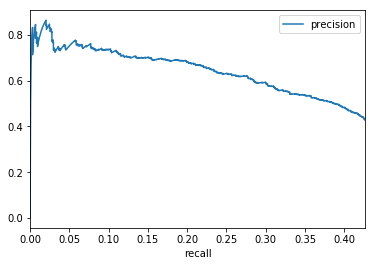

In [10]:
small_pr_df = small_results_df[['precision', 'recall']]
small_pr_df.plot(x='recall', y='precision')